For immersion: https://www.youtube.com/watch?v=sdBrscwwy_c

# 🌟 Operation NeuroNexus

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. You and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model.
4. After completing each task, you must answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [3]:
%load_ext autoreload
%autoreload 2

In [3]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation

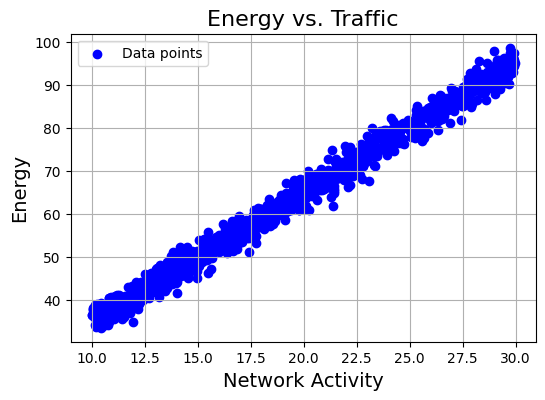

In [4]:
# Load data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

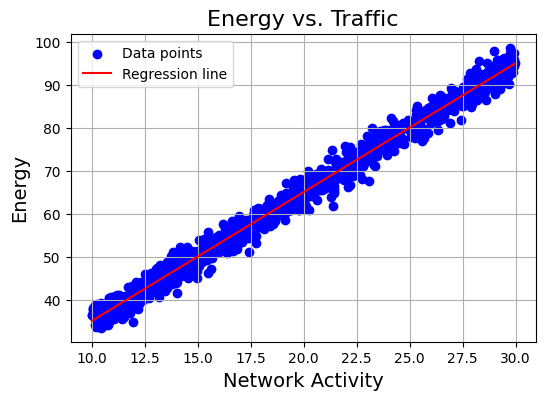

The average error is: 0.1462672001907622


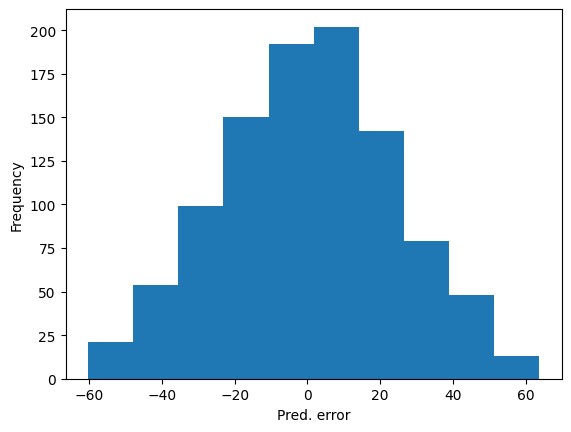

In [5]:
lr = LinearRegression()

lr.fit(data['Net_Activity'], data['Energy'])

model = lr.predict(data['Net_Activity'])

X = data['Net_Activity'].values

x_vals = np.linspace(X.min(), X.max(), 1000)
y_pred = lr.predict(x_vals)


plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.plot(x_vals, y_pred, c="red", label = "Regression line")
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

error = data['Energy'] - y_pred
plt.hist(error, bins = 10)
plt.xlabel("Pred. error")
plt.ylabel("Frequency")
print(f'The average error is: {np.mean(error)}')

Question 2b: Analyze prediction error distribution. What is an unbiased estimator?

Given the size-order of the data and error shown in the graph above, the error seems to be on the smaller side. The graph above shows us that the error seems to follow a Gaussian distribution, which is to be expected, and it tells us that the linear model is working as expected. The outliers in the +-60 area of the graph shows us that there is room for improvement and tuning of the hyper-parametres of the model, but given the frequency in which they appear, I wouldn't place all to much importance on this.

An unbiased estimator is an estimator with a bias of 0, which would mean that the estimator is correct on average. In other words, an estimator is said to be unbiased if the expected value is the same as the true value of the parametre.

## 🧠 Mission 2: Decoding SkyNet's signals

### 🌐 The Discovery
We've intercepted two types of signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

In [4]:
import logistic_regression as logr
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

x_train = train[['x0', 'x1']]
y_train = train ['y']
scaler = MinMaxScaler()

#training
x_train_scaled = scaler.fit_transform(x_train)
model = logr.LogisticRegression(learning_rate=0.1, epochs=10000, degree=10, treshold=0.5)
model.fit(x_train_scaled, y_train)

#testing
x_test = test[['x0', 'x1']]
x_test_scaled = scaler.transform(x_test)
y_pred = model.predict(x_test_scaled)

In [7]:
model_accuracy = np.mean(y_pred==test['y'].values)
print(model_accuracy)

0.882


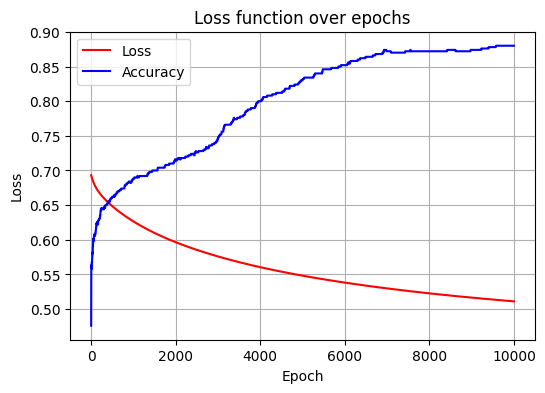

In [8]:
plt.figure(figsize=(6, 4))
plt.plot(model.losses, c='red', label='Loss')
plt.plot(model.train_accuracies, c='blue', label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss function over epochs')
plt.grid(True)
plt.legend()
plt.show()

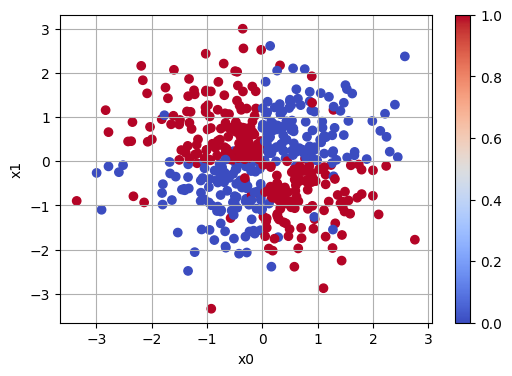

In [9]:
plt.figure(figsize=(6, 4))
plt.scatter(train['x0'], train['x1'], c=train['y'], cmap='coolwarm')
plt.colorbar()
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid(True)
plt.show()

3. **Discussion**:

   a. Explain poor initial performance and your improvements
      
      At first, I tried running the code with 1000 epochs. This gave an accuracy of 68% when I tried to run the code on the test data, which is less than ideal, to say the least. Increasing the epochs to 10000 gave an accuracy of 88.2%, which was within the criteria. The negative side of this is that it took about 5 times as long to run the LogisticRegression-function.

   b. What is the model's inductive bias. Why is it important?

      The inductive bias of a model is the set of assumptions that the model uses when it makes predictions on unseen data based on its training data. This is important because it helps an algorithm generalize from limited training data onto unseen data. Without inductive bias, the model can make inaccurate predictions or overfit the training data, which could lead to poor performance on new data.

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?

   Code for this is shown in the cell below. It is possible and the code gets much simpler, but we get a lower accuracy.


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree_model = DecisionTreeClassifier(max_depth = 1000, random_state=1000)
tree_model.fit(x_train, y_train)

y_pred_tree = tree_model.predict(x_test)

acc = accuracy_score(test['y'].values, y_pred_tree)
print(acc)

0.874


   d. Plot the ROC curve

   Plot beneath

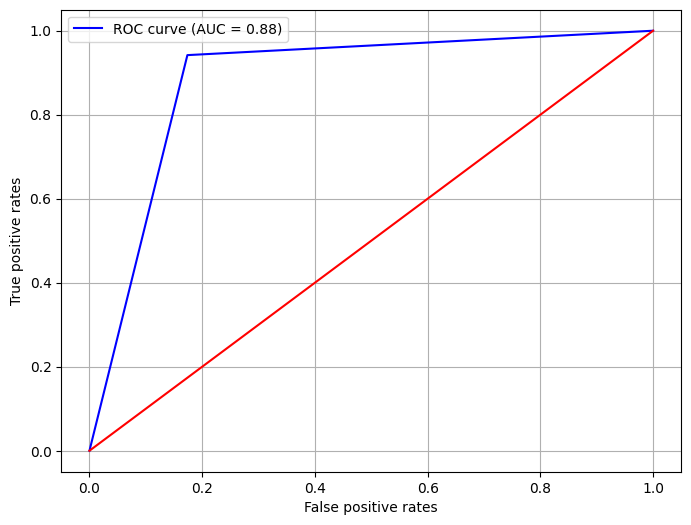

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred = model.predict(x_test_scaled)
fpr, tpr, tresholds = roc_curve(test['y'].values, y_pred)
auc_roc = roc_auc_score(test['y'].values, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {auc_roc:.2f})')
plt.plot([0,1], [0,1], color = 'r')
plt.xlabel("False positive rates")
plt.ylabel("True positive rates")
plt.legend()
plt.grid()
plt.show()

## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use binary encryption. We need a system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`. 

Only one of the data streams needs to be decrypted, but you will need to identify the correct one.

To decrypt a data stream, transform the data into a binary representation based on whether the feature is even or odd.

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

In [12]:
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

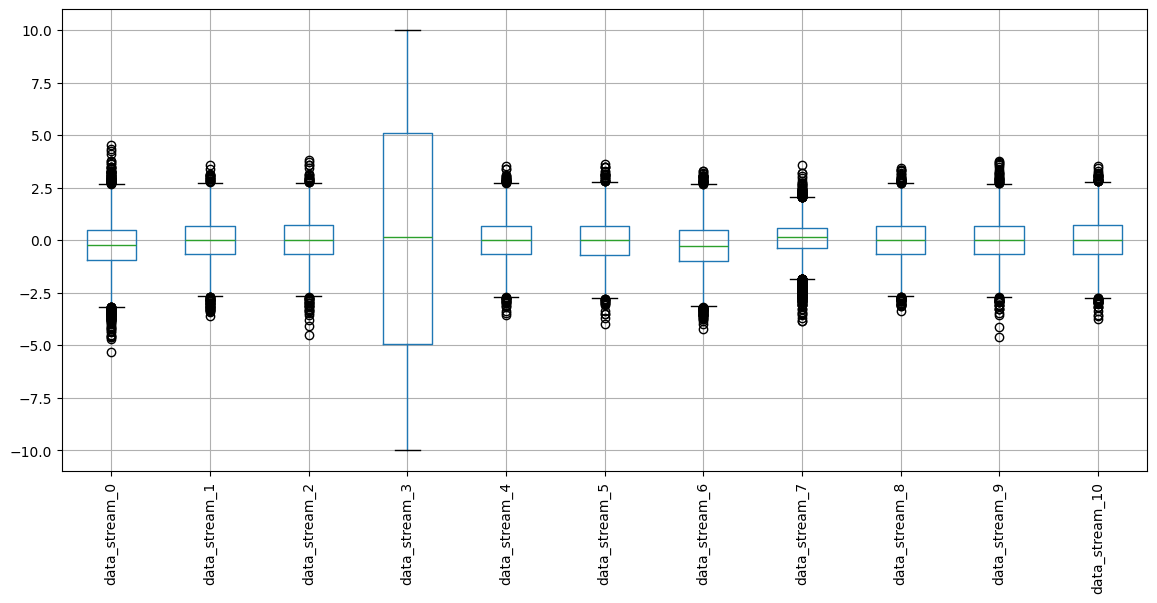

In [13]:
plt.figure(figsize=(14,6))
x_train = train.drop("target", axis=1)
x_test = test.drop("target", axis=1)
x_train.boxplot(rot=90)
plt.show()

In [14]:

#Training
most_anom_col = "data_stream_3" #from firgure above
train[most_anom_col] = (train[most_anom_col]*1000)%2

x_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]
#type(y_train)
if y_train.dtype == 'float' or y_train.dtype == "int":
    y_train = pd.cut(y_train, bins = 2, labels=[0, 1])


#Testing
test[most_anom_col] = (test[most_anom_col]*1000)%2

x_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

In [15]:
model_d = DecisionTreeClassifier(
    criterion='entropy',
    max_depth = 7, 
    class_weight='balanced'
)

model_d.fit(x_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [16]:
y_pred = model_d.predict(x_test)
y_pred_prob = model_d.predict_proba(x_test)[:, 1]

acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc}")
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC score: {round(roc_auc, 2)}")

Accuracy: 0.6085
ROC AUC score: 0.72



#### Discussion

a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

I first visualized the data to find the outlying data stream (data stream three). Then, I used sckikit's DecisionTreeClassifier to make a decision tree and experimented with different hyperparametres to tune the model. From this I found that using entropy loss and a max depth of 7 worked best - a max depth any higher or lower than 7 gave un-ideal results.

b. Justify ROC AUC usage. Plot and interpret ROC.

Plot below. ROC AUC measures how the model handles presicion and recall, which can tell us more than just measuring accuraacy. From the figure below, we can see that it performs well enough to satisfy the criteria in the task, but not by a whole lot.

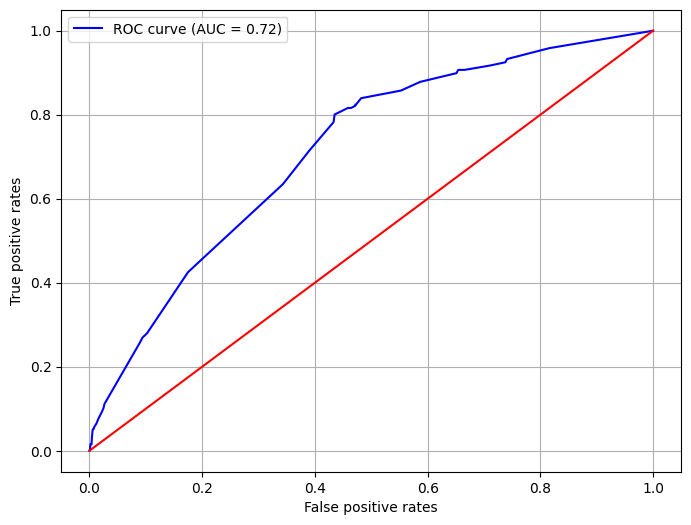

In [17]:
fpr, tpr, tresholds = roc_curve(y_test, y_pred_prob)
auc_roc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {auc_roc:.2f})')
plt.plot([0,1], [0,1], color = 'r')
plt.xlabel("False positive rates")
plt.ylabel("True positive rates")
plt.legend()
plt.grid()
plt.show()

   
c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

Code below. It gives us an ROC AUC score of 0.715, which is the same as using Desicion Tree. Parameter tuning (setting min_samples_split=4) gives us ROC AUC score of 0.7218. Further tuning could probably give us a higher score.


In [23]:
from sklearn.ensemble import RandomForestClassifier

sk_model = RandomForestClassifier(
    max_depth=7,
    class_weight="balanced",
    min_samples_split=4
)

sk_model.fit(x_train, y_train)
y_pred_prob = sk_model.predict_proba(x_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Accuracy: {acc}")
print(f"ROC AUC: {roc_auc}")

Accuracy: 0.6085
ROC AUC: 0.7218043543861677


## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the **Nexus Rating** of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 💡 Hint
You suspect that an insider has tampered with the columns in the testing data... 

Compare the training and test distributions and try to rectify the test dataset.

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [5]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

Text(0, 0.5, 'Count')

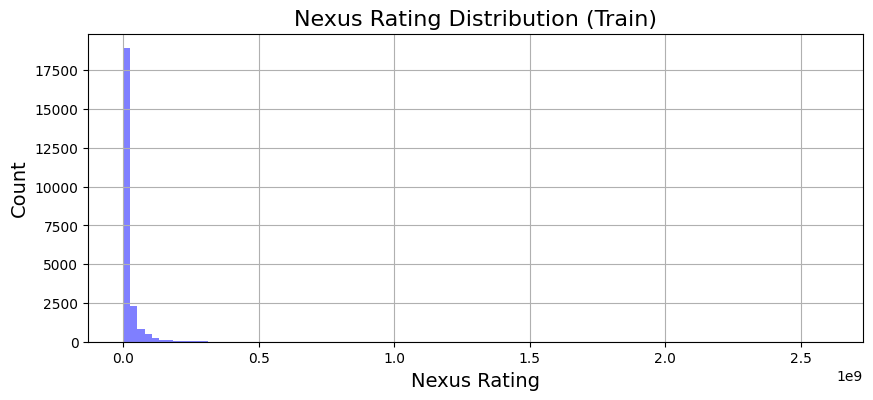

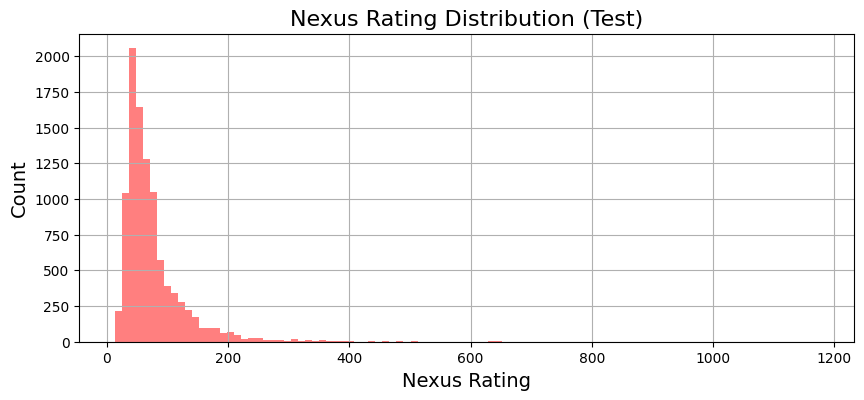

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon')
ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
test['nexus_rating'].hist(bins=100, ax=ax, color='red', alpha=0.5, label='Test Target Distributuon')
ax.set_title('Nexus Rating Distribution (Test)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

In [7]:
#shift test data one column to the right except for ownership type
shift_cols = [col for col in test.columns if col != 'ownership_type']
shifted_cols = np.roll(shift_cols, 1)
test[shift_cols] = test[shifted_cols].values

In [8]:
test.dropna(inplace=True)
train.dropna(inplace=True)

x_train = train.drop(columns=['nexus_rating'])
x_test = test.drop(columns=['nexus_rating'])

y_train = train['nexus_rating'].values
y_test = test['nexus_rating'].values

In [9]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import RidgeCV

rf = RandomForestRegressor(
    n_estimators=500,
    max_depth = None,
    random_state=42,
    n_jobs=-1
)

cat = CatBoostRegressor(
    iterations=2000,
    learning_rate=0.05,
    depth = 8,
    l2_leaf_reg=20,
    early_stopping_rounds=200
)

est = [('rf', rf), ('cat', cat)]

stack = StackingRegressor(
    estimators=[('rf', rf), ('cat', cat)],
    final_estimator=RidgeCV(alphas=(0.1, 1.0, 10.0)),
    cv = 5,
    n_jobs = -1,
    passthrough=False
)

y_train_log = np.log1p(y_train)
stack.fit(x_train, y_train_log)

y_pred = stack.predict(x_test)
y_pred = np.expm1(y_pred)

0:	learn: 0.4813391	total: 115ms	remaining: 3m 49s
1:	learn: 0.4708876	total: 118ms	remaining: 1m 58s
2:	learn: 0.4612655	total: 123ms	remaining: 1m 21s
3:	learn: 0.4520682	total: 126ms	remaining: 1m 2s
4:	learn: 0.4442058	total: 128ms	remaining: 51.1s
5:	learn: 0.4366735	total: 132ms	remaining: 44s
6:	learn: 0.4286259	total: 136ms	remaining: 38.7s
7:	learn: 0.4220694	total: 141ms	remaining: 35s
8:	learn: 0.4153709	total: 145ms	remaining: 32.1s
9:	learn: 0.4066793	total: 150ms	remaining: 29.8s
10:	learn: 0.4006727	total: 155ms	remaining: 28s
11:	learn: 0.3946615	total: 161ms	remaining: 26.7s
12:	learn: 0.3889827	total: 166ms	remaining: 25.4s
13:	learn: 0.3831507	total: 177ms	remaining: 25.1s
14:	learn: 0.3784058	total: 182ms	remaining: 24.1s
15:	learn: 0.3728046	total: 188ms	remaining: 23.3s
16:	learn: 0.3674307	total: 197ms	remaining: 23s
17:	learn: 0.3633312	total: 202ms	remaining: 22.3s
18:	learn: 0.3584196	total: 211ms	remaining: 22s
19:	learn: 0.3535635	total: 220ms	remaining: 21.

In [10]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [11]:
# Example rmsle check
print('RMSLE: ', rmsle(y_test, y_pred).round(3))
print('Required RMSLE: ', 0.294)

RMSLE:  0.254
Required RMSLE:  0.294


#### Discussion

a. Explain your threshold-breaking strategy

I had to alter the column data by shifting every column (except for 'ownership type') to the right, as it had been alterd. After this, I removed all elements with invalid data from both datasets and used log-transformation to prevent outliers from dominating the result. 

b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

RMSLE is often used when the target value varies across several orders of magnitudes, as it prevents large values from dominating the error. The model is punished harder for proportional errors rather than aboslution. The loss function used here was the mean square of the logrithmic transformation of the target.

c. Plot and interpret feature importances

Code below. The graph shows us that energy_footprint is the most important value for nexus_rating, meaning the models value energy_footprint most when predicting the nexus_rating.

0:	learn: 24234311.8714982	total: 44.1ms	remaining: 1m 28s
1:	learn: 24147452.4637080	total: 61.6ms	remaining: 1m 1s
2:	learn: 24101521.7705408	total: 81.6ms	remaining: 54.3s
3:	learn: 24055192.0016143	total: 84ms	remaining: 41.9s
4:	learn: 24009861.8124745	total: 88.6ms	remaining: 35.3s
5:	learn: 23964609.1784830	total: 91.4ms	remaining: 30.4s
6:	learn: 23920133.9195436	total: 97.9ms	remaining: 27.9s
7:	learn: 23875447.7132091	total: 102ms	remaining: 25.3s
8:	learn: 23830804.4092087	total: 102ms	remaining: 22.6s
9:	learn: 23787471.8052927	total: 104ms	remaining: 20.7s
10:	learn: 23743280.6999344	total: 107ms	remaining: 19.4s
11:	learn: 23700066.4609279	total: 110ms	remaining: 18.3s
12:	learn: 23656317.2882856	total: 111ms	remaining: 17s
13:	learn: 23612709.2494134	total: 112ms	remaining: 15.9s
14:	learn: 23568681.9479615	total: 116ms	remaining: 15.3s
15:	learn: 23525458.2370495	total: 118ms	remaining: 14.6s
16:	learn: 23446618.7973947	total: 133ms	remaining: 15.5s
17:	learn: 23405227.

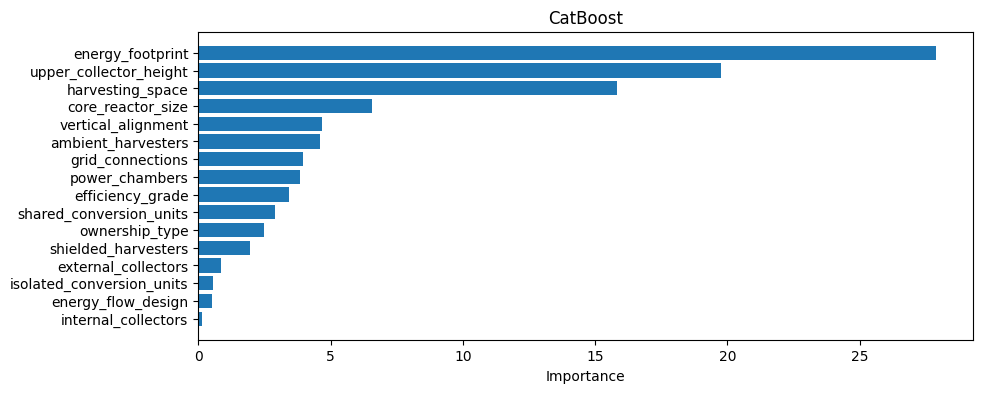

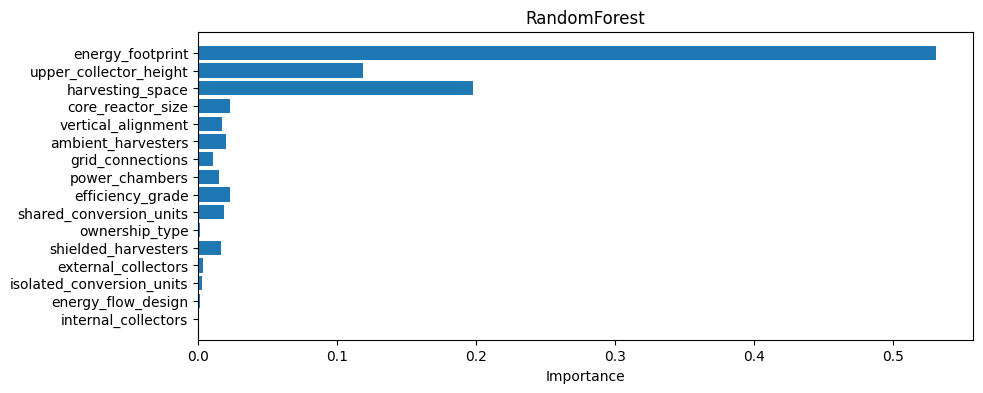

In [13]:
cat.fit(x_train, y_train)
rf.fit(x_train, y_train)

cat_imp = cat.get_feature_importance()
rf_imp = rf.feature_importances_
features = x_train.columns

indices = np.argsort(cat_imp)

plt.figure(figsize=(10,4))
plt.barh(features[indices], cat_imp[indices])
plt.title("CatBoost")
plt.xlabel("Importance")

plt.figure(figsize=(10,4))
plt.barh(features[indices], rf_imp[indices])
plt.title("RandomForest")
plt.xlabel("Importance")

plt.show()

d. Describe your ensembling techniques

RandomForestRegressor uses bagging, CatBoostRegressor uses boosting, and RidgeCV uses stacking. By combining these into one ensemble, it allows us to use their different strengths for our prediciton.

e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

In real life, I would probably use a variant of cross-validation (k-fold or leave-one-out), as splits the training data-set into a set amount (n or k), train on one (or multiple, depending on if you're using LOOCV or k-fold) datapoint and evaluate on another, and repeat for all n or k. This helps us estimate how the model actually will behave on unseen parametres without having a test dataset. The problem with this is that I would have to train n (LOOCV) models, which can take a long time.